In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import (
    norm,
    inv
)
%matplotlib inline


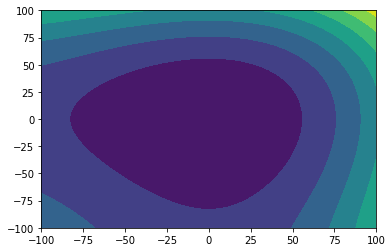

In [14]:
def f(theta):
    return np.sum((theta**3 - theta**2) + 200 * theta**2)
#     return (theta ** 3).dot(np.ones(len(theta)))

def g(theta):
    return 2*theta

def grid_eval(f, x1, x2):
    return np.array(
        [
            f(np.array([x1, y1]))
            for x1 in x
            for y1 in y
        ]
    ).reshape((len(x1), len(x2)))

n_axis_points = 100
x = np.linspace(-1e2, 1e2, n_axis_points)
y = np.linspace(-1e2, 1e2, n_axis_points)
z = grid_eval(f, x, y)
plt.contourf(x, y, z)


Reached convergence criterion after 76.


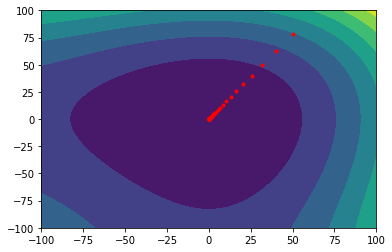

In [24]:
class LineSearch(object):
    
    def __init__(self, f, g, max_n_iter=1000, min_delta=1e-6):
        self.f = f
        self.g = g
        self.max_n_iter = 1000
        self.min_delta = 1e-6
        
    def run(self, init, learning_rate):
        theta = init
        n_iter = 0
        norm_delta = np.inf
        while n_iter < self.max_n_iter and norm_delta > self.min_delta:
            n_iter += 1
            last_theta = theta
            theta = theta - learning_rate * g(theta)
            plt.scatter(*theta, color='r', marker='.')
            norm_delta = norm(last_theta - theta)
            if norm_delta < self.min_delta:
                print("Reached convergence criterion after {}.".format(n_iter))
            elif n_iter == self.max_n_iter:
                print("Reached max # iterations.")
        return theta
    
n_axis_points = 100
x = np.linspace(-1e2, 1e2, n_axis_points)
y = np.linspace(-1e2, 1e2, n_axis_points)
z = grid_eval(f, x, y)
plt.contourf(x, y, z)

prog = LineSearch(f, g)
init = np.array([50, 78])
plt.scatter(*init, color='r', marker='.')
opt = prog.run(init, 0.1)
plt.scatter(*opt, color='r', marker='.')
    